# Data Extraction


The following commands will fetch the CSV files from its remote server, download the zipped files and unzip it.

In [1]:
#The following command downloads all 2019/2020 csv files from  citibike amazon S3 server using http protocol
!curl -O "https://s3.amazonaws.com/tripdata/2019[03-06]-citibike-tripdata.csv.zip"
!curl -O "https://s3.amazonaws.com/tripdata/2020[03-06]-citibike-tripdata.csv.zip"
# extract all files from the the specified zip archive to the current directoy
!unzip '*.zip'
!rm *.zip

In [2]:
#import libraries
import glob #using glob to read multiple files
import datetime #manipulate DateTime 
import pandas as pd # structure the datasets
import numpy as np #manipulate the dataset
import seaborn as sns #visualize the data 
from matplotlib import pyplot as plt  #visualize the data 
%matplotlib inline 

sns.set(style="whitegrid") 

In [3]:
#The following commands reduce the data frame memory by simply selecting the appropriate data 
#types and load the neccesary columns.


filenames = sorted(glob.glob('*.csv'))#Gets the files


#specifying the neccesary columns  
cols = ["tripduration","starttime","start station name","end station name","usertype","birth year","gender"]

#modifying the columns type
col_type={'birth year':'int16', 'gender':'int8'}


# Loop through file names and read the data
dfs = []
for file in filenames:
    print('Reading ' + file)
    #dfs.append(pd.read_csv(file))
    df = pd.read_csv(file, usecols = cols, dtype = col_type)
    dfs.append(df)

Reading 201903-citibike-tripdata.csv
Reading 201904-citibike-tripdata.csv
Reading 201905-citibike-tripdata.csv
Reading 201906-citibike-tripdata.csv
Reading 202003-citibike-tripdata.csv
Reading 202004-citibike-tripdata.csv
Reading 202005-citibike-tripdata.csv
Reading 202006-citibike-tripdata.csv


In [4]:
df = pd.concat(dfs, ignore_index=True)

In [5]:
# Checks out the total data
rows = df.shape[0]
print(str(rows) + " Rows")

12265369 Rows


In [6]:
df.head(5) #overview of the dataset

,tripduration,starttime,start station name,end station name,usertype,birth year,gender
0,1463,2019-03-01 00:00:16.0970,Fulton St & Broadway,Greenwich St & W Houston St,Subscriber,1989,1
1,285,2019-03-01 00:00:32.3850,E 4 St & 2 Ave,E 2 St & Avenue C,Subscriber,1980,1
2,686,2019-03-01 00:00:47.7970,E 33 St & 5 Ave,6 Ave & Spring St,Subscriber,1987,1
3,442,2019-03-01 00:01:01.2090,6 Ave & Spring St,Bayard St & Baxter St,Subscriber,1987,2
4,2913,2019-03-01 00:01:09.2810,W 31 St & 7 Ave,W 16 St & The High Line,Subscriber,1991,1


# Cleaning & manipulating data

In [7]:
#checking for missing values
missing_v = df.isnull().sum()
missing_v

tripduration           0
starttime              0
start station name    10
end station name      10
usertype               0
birth year             0
gender                 0
dtype: int64

In [8]:
#dropping NaN/missing values
df = df.dropna()


In [9]:
#renaming columns to a more recognisable sets of labels
df.columns=['tripduration','starttime','start_station_name','end_station_name','usertype','birth_year','gender']

#transforming the gender values
df.loc[df['gender'] == 2, 'gender'] = 'Female'
df.loc[df['gender'] == 1, 'gender'] = 'Male'
df.loc[df['gender'] == 0, 'gender'] = 'other'

# calculating the age considering that the year is 2020
df['age'] = 2020 - df['birth_year']

#categorising age column
df['age_group']=pd.cut(df.age,bins = [16,30,50,90], labels =['16-29','30-49','50-89'])


# calculating the month from the startime
df['month'] = pd.to_datetime(df["starttime"]).dt.strftime('%B')



# calculating the year from the startime
df['year'] = pd.to_datetime(df["starttime"]).dt.strftime('%Y')



In [10]:
df.head(5) 

,tripduration,starttime,start_station_name,end_station_name,usertype,birth_year,gender,age,age_group,month,year
0,1463,2019-03-01 00:00:16.0970,Fulton St & Broadway,Greenwich St & W Houston St,Subscriber,1989,Male,31,30-49,March,2019
1,285,2019-03-01 00:00:32.3850,E 4 St & 2 Ave,E 2 St & Avenue C,Subscriber,1980,Male,40,30-49,March,2019
2,686,2019-03-01 00:00:47.7970,E 33 St & 5 Ave,6 Ave & Spring St,Subscriber,1987,Male,33,30-49,March,2019
3,442,2019-03-01 00:01:01.2090,6 Ave & Spring St,Bayard St & Baxter St,Subscriber,1987,Female,33,30-49,March,2019
4,2913,2019-03-01 00:01:09.2810,W 31 St & 7 Ave,W 16 St & The High Line,Subscriber,1991,Male,29,16-29,March,2019


# Analysing and visualising data

## Did CitiBike suffer a drastic ridership reduction during lockdown ?

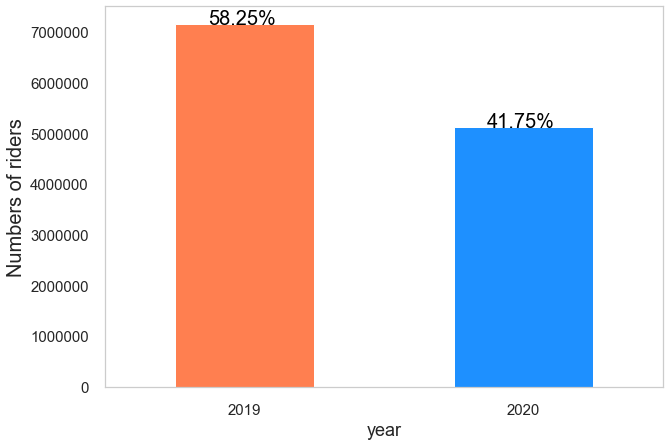

In [11]:
ax = df['year'].value_counts().plot(kind='bar', figsize=(10,7),color=['coral','dodgerblue'], fontsize=15);

ax.set_alpha(0.8)
ax.set_title("", fontsize=20)
ax.set_ylabel("Numbers of riders", fontsize=20);
ax.set_xlabel("year", fontsize=18);

plt.xticks(rotation=0,horizontalalignment="center")


# padding between axes and labels 
ax.xaxis.set_tick_params(pad = 10) 
ax.yaxis.set_tick_params(pad = 10) 

total = df.shape[0]    
    
# Adding x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2) 


# setting individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height(), \
            str(round((i.get_height())*100/total, 2))+'%', fontsize=20,
                color='black',)

# Has the number of rideship gone down or stayed thesame during lockdown ?

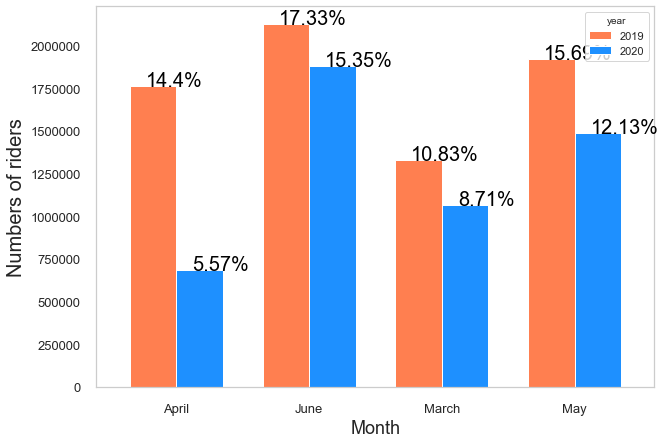

In [12]:
ax = df.groupby(['month', 'year']).size().unstack().plot(kind='bar', figsize=(10,7),
                                        color=['coral','dodgerblue'], fontsize=13, width=0.7 )

ax.set_alpha(0.8)
ax.set_title("", fontsize=20)
ax.set_ylabel("Numbers of riders", fontsize=20);
ax.set_xlabel("Month", fontsize=18);

plt.xticks(rotation=0,horizontalalignment="center")


#padding between axes and labels 
ax.xaxis.set_tick_params(pad = 10) 
ax.yaxis.set_tick_params(pad = 10) 

total = df.shape[0]    
    
# Adding x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2) 


# setting individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height(), \
            str(round((i.get_height())*100/total, 2))+'%', fontsize=20,
                color='black',)




# Are subscribers and cusomers travelling travelling less during lockdown and following the Stay-at-home orders?

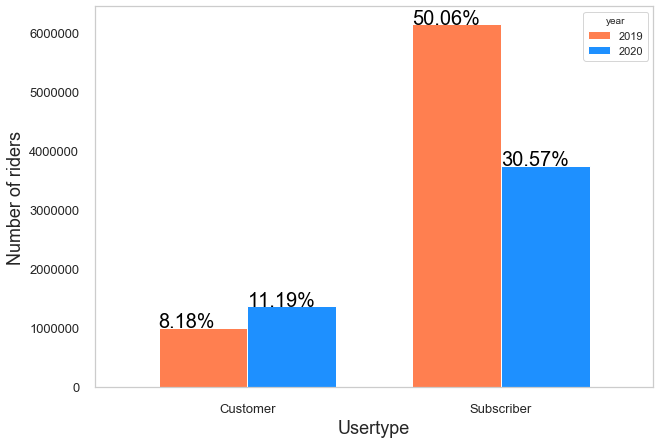

In [13]:
ax = df.groupby(['usertype', 'year']).size().unstack().plot(kind='bar', figsize=(10,7),
                                        color=['coral','dodgerblue'], fontsize=13, width=0.7 )

ax.set_alpha(0.8)
ax.set_title("", fontsize=18)
ax.set_ylabel("Number of riders", fontsize=18);
ax.set_xlabel("Usertype", fontsize=18);

plt.xticks(rotation=0,horizontalalignment="center")

#padding between axes and labels 
ax.xaxis.set_tick_params(pad = 10) 
ax.yaxis.set_tick_params(pad = 10) 

total = df.shape[0]  
    
# Adding x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)

# setting individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height())*100/total, 2))+'%', fontsize=20,
                color='black')

# what age group has frequenty ride bikes during lockdown?

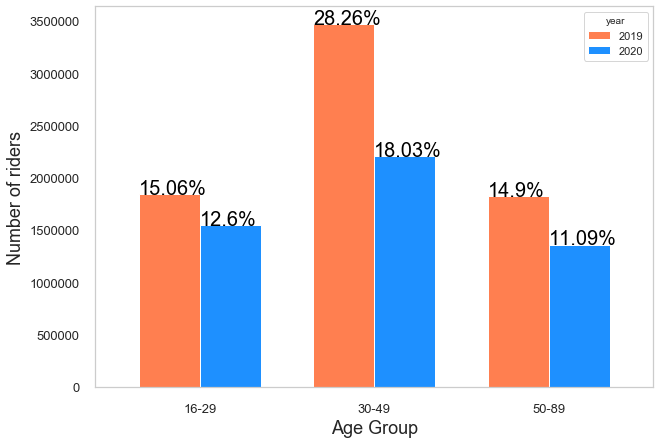

In [14]:
ax = df.groupby(['age_group', 'year']).size().unstack().plot(kind='bar', figsize=(10,7),
                                        color=['coral','dodgerblue'], fontsize=13, width=0.7 )

ax.set_alpha(0.8)
ax.set_title("", fontsize=18)
ax.set_ylabel("Number of riders", fontsize=18);
ax.set_xlabel("Age Group", fontsize=18);

plt.xticks(rotation=0,horizontalalignment="center")

#padding between axes and labels 
ax.xaxis.set_tick_params(pad = 10) 
ax.yaxis.set_tick_params(pad = 10) 

total = df.shape[0]  
    
# Adding x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height())*100/total, 2))+'%', fontsize=20,
                color='black')

    


# Has the number of female riders drop during lockdwon ?

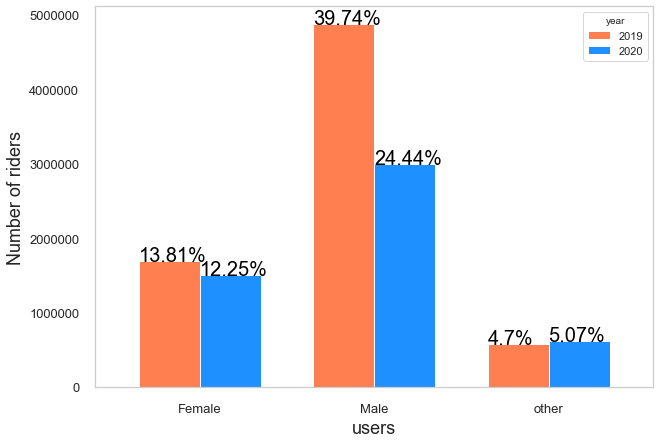

In [15]:
ax = df.groupby(['gender', 'year']).size().unstack().plot(kind='bar', figsize=(10,7),
                                        color=['coral','dodgerblue'], fontsize=13, width=0.7 )

ax.set_alpha(0.8)
ax.set_title("", fontsize=18)
ax.set_ylabel("Number of riders", fontsize=18);
ax.set_xlabel("users", fontsize=18);

plt.xticks(rotation=0,horizontalalignment="center")

#padding between axes and labels 
ax.xaxis.set_tick_params(pad = 10) 
ax.yaxis.set_tick_params(pad = 10) 

total = df.shape[0]  
    
# Adding x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height())*100/total, 2))+'%', fontsize=20,
                color='black')



## Did the top Location that the riders visited changed?

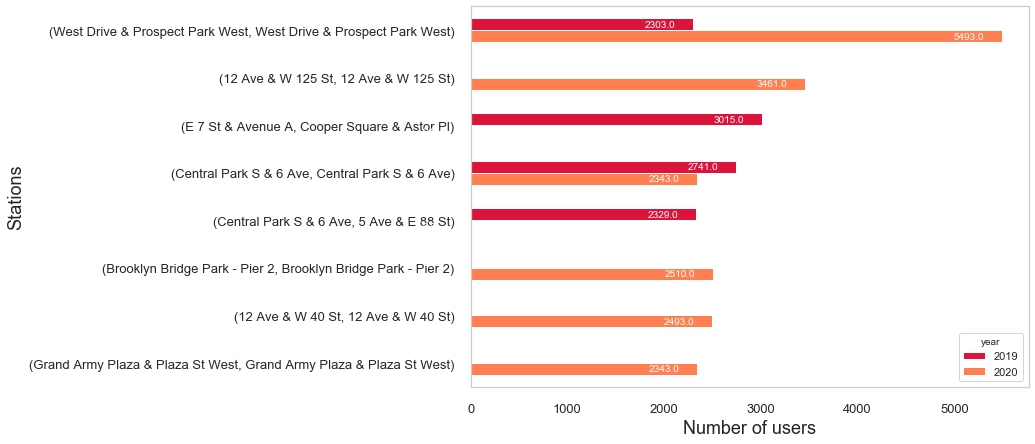

In [16]:
ax = df.groupby(['start_station_name','end_station_name','year']).size().nlargest(10).unstack().plot(kind='barh',figsize=(10,7), color=['crimson','coral'], fontsize=13)



ax.set_alpha(0.8)
ax.set_title("",fontsize=18)
ax.set_xlabel("Number of users", fontsize=18)
ax.set_ylabel("Stations", fontsize=18)


# padding between axes and labels 
ax.xaxis.set_tick_params(pad = 10) 
ax.yaxis.set_tick_params(pad = 10) 

total= df.shape[0]
  
# Adding x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='', linewidth = 0.5, alpha = 0.2)


# setting individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-500, i.get_y()+.18, \
            str(round((i.get_width()), 2)), fontsize=10, color='white')

    
# Show top values 
ax.invert_yaxis()  

